## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test),
          validation_split=0.9,
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 303us/step - loss: 3.0806 - accuracy: 0.2406 - val_loss: 1.8581 - val_accuracy: 0.3262
Epoch 2/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.8252 - accuracy: 0.3349 - val_loss: 1.7894 - val_accuracy: 0.3513
Epoch 3/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.7296 - accuracy: 0.3711 - val_loss: 1.7620 - val_accuracy: 0.3498
Epoch 4/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.6890 - accuracy: 0.3905 - val_loss: 1.6659 - val_accuracy: 0.4017
Epoch 5/500
50000/50000 [==============================] - 11s 221us/step - loss: 1.6635 - accuracy: 0.3996 - val_loss: 1.6521 - val_accuracy: 0.4104
Epoch 6/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.6487 - accuracy: 0.4050 - val_loss: 1.6733 - val_accuracy: 0.4002
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.4874 - accuracy: 0.4679 - val_loss: 1.5962 - val_accuracy: 0.4349
Epoch 56/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.4840 - accuracy: 0.4713 - val_loss: 1.5671 - val_accuracy: 0.4372
Epoch 57/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.4764 - accuracy: 0.4735 - val_loss: 1.6084 - val_accuracy: 0.4402
Epoch 58/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.4822 - accuracy: 0.4696 - val_loss: 1.6247 - val_accuracy: 0.4281
Epoch 59/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.4876 - accuracy: 0.4668 - val_loss: 1.5791 - val_accuracy: 0.4418
Epoch 60/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.4762 - accuracy: 0.4747 - val_loss: 1.5517 - val_accuracy: 0.4479
Epoch 61/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.4816 - ac

Epoch 163/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.4303 - accuracy: 0.4928 - val_loss: 1.5924 - val_accuracy: 0.4411
Epoch 164/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.4332 - accuracy: 0.4882 - val_loss: 1.6054 - val_accuracy: 0.4437
Epoch 165/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.4462 - accuracy: 0.4877 - val_loss: 1.6315 - val_accuracy: 0.4432
Epoch 166/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.4409 - accuracy: 0.4886 - val_loss: 1.6280 - val_accuracy: 0.4317
Epoch 167/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.4374 - accuracy: 0.4899 - val_loss: 1.5906 - val_accuracy: 0.4548
Epoch 168/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.4355 - accuracy: 0.4920 - val_loss: 1.6643 - val_accuracy: 0.4300
Epoch 169/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.43

Epoch 270/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.3903 - accuracy: 0.5053 - val_loss: 1.6297 - val_accuracy: 0.4434
Epoch 271/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.4095 - accuracy: 0.4992 - val_loss: 1.6186 - val_accuracy: 0.4473
Epoch 272/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.4066 - accuracy: 0.5026 - val_loss: 1.6786 - val_accuracy: 0.4294
Epoch 273/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.4110 - accuracy: 0.4992 - val_loss: 1.6464 - val_accuracy: 0.4388
Epoch 274/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.3885 - accuracy: 0.5081 - val_loss: 1.6434 - val_accuracy: 0.4383
Epoch 275/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.3951 - accuracy: 0.5064 - val_loss: 1.6332 - val_accuracy: 0.4423
Epoch 276/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.40

Epoch 324/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.4128 - accuracy: 0.4995 - val_loss: 1.7503 - val_accuracy: 0.3844
Epoch 325/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.4083 - accuracy: 0.5018 - val_loss: 1.6421 - val_accuracy: 0.4347
Epoch 326/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.3981 - accuracy: 0.5043 - val_loss: 1.6573 - val_accuracy: 0.4306
Epoch 327/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.4066 - accuracy: 0.5021 - val_loss: 1.6306 - val_accuracy: 0.4388
Epoch 328/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.3808 - accuracy: 0.5106 - val_loss: 1.6663 - val_accuracy: 0.4378
Epoch 329/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3778 - accuracy: 0.5099 - val_loss: 1.6350 - val_accuracy: 0.4358
Epoch 330/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.37

Epoch 431/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.3429 - accuracy: 0.5229 - val_loss: 1.6665 - val_accuracy: 0.4380
Epoch 432/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.3421 - accuracy: 0.5254 - val_loss: 1.6789 - val_accuracy: 0.4375
Epoch 433/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.3410 - accuracy: 0.5243 - val_loss: 1.6772 - val_accuracy: 0.4319
Epoch 434/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3541 - accuracy: 0.5177 - val_loss: 1.6650 - val_accuracy: 0.4367
Epoch 435/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.3482 - accuracy: 0.5237 - val_loss: 1.6960 - val_accuracy: 0.4311
Epoch 436/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3611 - accuracy: 0.5178 - val_loss: 1.6620 - val_accuracy: 0.4461
Epoch 437/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.36

Epoch 485/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.3454 - accuracy: 0.5233 - val_loss: 1.6747 - val_accuracy: 0.4399
Epoch 486/500
50000/50000 [==============================] - 10s 206us/step - loss: 1.3666 - accuracy: 0.5139 - val_loss: 1.7087 - val_accuracy: 0.4354
Epoch 487/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.3381 - accuracy: 0.5267 - val_loss: 1.6753 - val_accuracy: 0.4363
Epoch 488/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.3379 - accuracy: 0.5258 - val_loss: 1.7181 - val_accuracy: 0.4336
Epoch 489/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.3499 - accuracy: 0.5217 - val_loss: 1.6834 - val_accuracy: 0.4366
Epoch 490/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.3409 - accuracy: 0.5264 - val_loss: 1.7290 - val_accuracy: 0.4269
Epoch 491/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.33

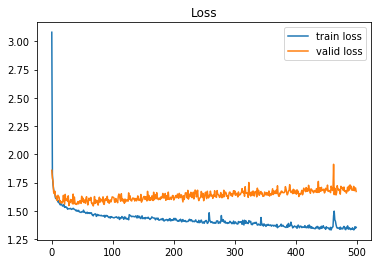

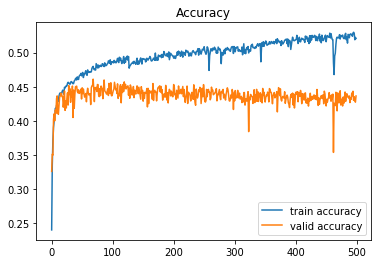

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


In [12]:
optimizer= keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test),
          validation_split=0.9,
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.8515 - accuracy: 0.3356 - val_loss: 1.6926 - val_accuracy: 0.4055
Epoch 2/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6412 - accuracy: 0.4180 - val_loss: 1.6243 - val_accuracy: 0.4122
Epoch 3/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.5498 - accuracy: 0.4516 - val_loss: 1.7285 - val_accuracy: 0.3907
Epoch 4/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.4919 - accuracy: 0.4714 - val_loss: 1.5290 - val_accuracy: 0.4551
Epoch 5/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.4387 - accuracy: 0.4908 - val_loss: 1.4789 - val_accuracy: 0.4664
Epoch 6/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.3960 - accuracy: 0.5027 - val_loss: 1.5537 - val_accuracy: 0.4548
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 142us/step - loss: 0.3517 - accuracy: 0.8765 - val_loss: 2.0921 - val_accuracy: 0.5356
Epoch 56/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.3359 - accuracy: 0.8826 - val_loss: 2.2389 - val_accuracy: 0.5194
Epoch 57/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.3162 - accuracy: 0.8880 - val_loss: 2.2262 - val_accuracy: 0.5259
Epoch 58/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.2959 - accuracy: 0.8958 - val_loss: 2.4841 - val_accuracy: 0.5064
Epoch 59/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.2953 - accuracy: 0.8960 - val_loss: 2.3215 - val_accuracy: 0.5283
Epoch 60/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.2833 - accuracy: 0.8999 - val_loss: 2.3175 - val_accuracy: 0.5279
Epoch 61/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.2753 - accuracy: 0.9029 - val

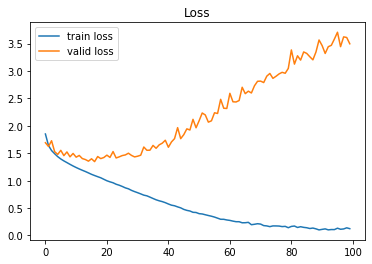

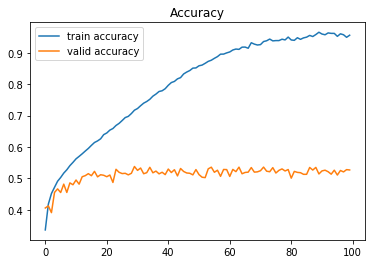

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
